In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [45]:
data = pd.read_csv('./data/insurance.csv')

In [46]:
data.sample(6)

,age,sex,bmi,children,smoker,region,charges
1213,52,female,33.300,2,no,southwest,10806.83900
116,58,male,49.060,0,no,southeast,11381.32540
325,40,male,34.105,1,no,northeast,6600.20595
1039,19,male,27.265,2,no,northwest,22493.65964
251,63,female,32.200,2,yes,southwest,47305.30500
90,21,female,39.490,0,no,southeast,2026.97410


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Numerical Variables*
- Age
- BMI
- Charges
  
*Categorical Variables*
- sex
- children
- smoker
- region

In [48]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

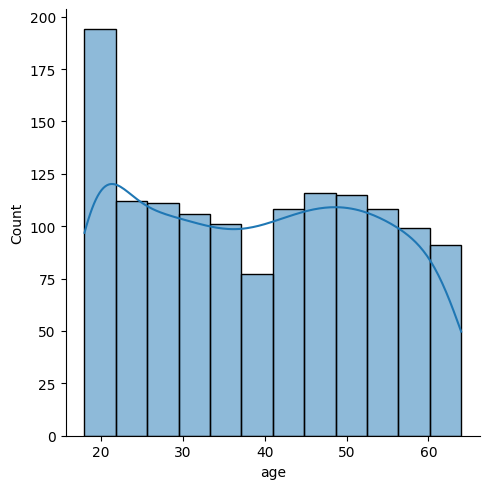

In [49]:
sns.displot(data,x='age',kde=True)

We must look to tranform this column so as to give a better linear model.

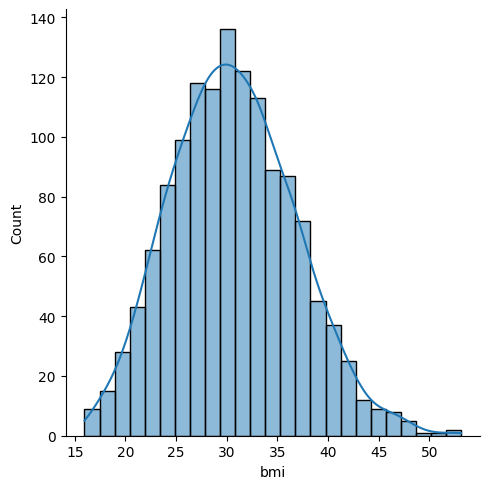

In [50]:
sns.displot(data,x='bmi',kde=True)

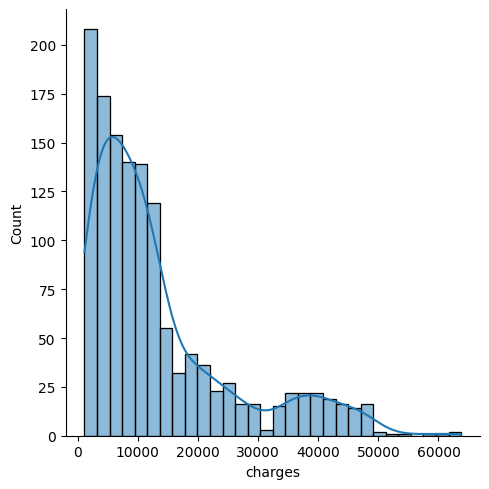

In [51]:
sns.displot(data,x='charges',kde=True)

We need to transform this `charges` to make it more linear

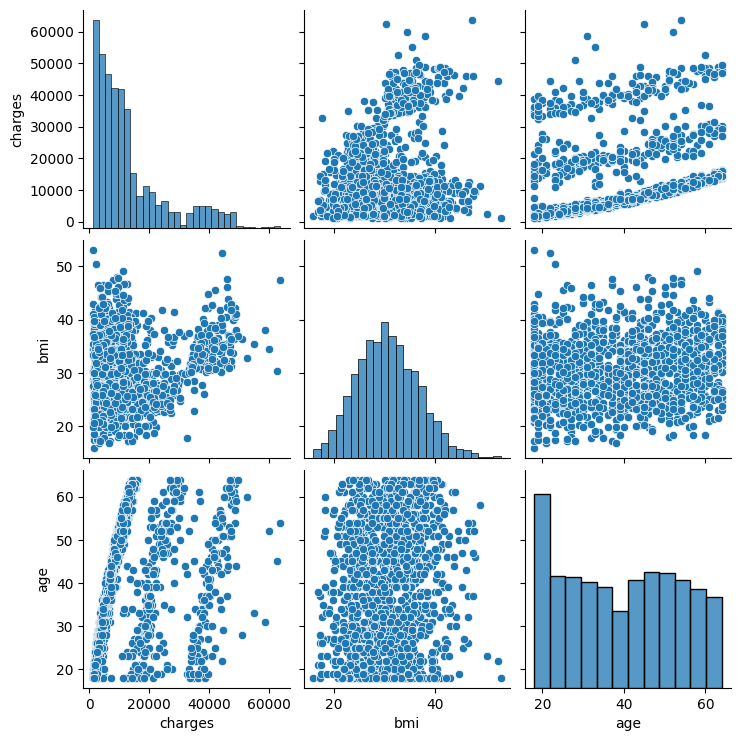

In [52]:
sns.pairplot(data,vars=['charges','bmi','age'])

<Axes: >

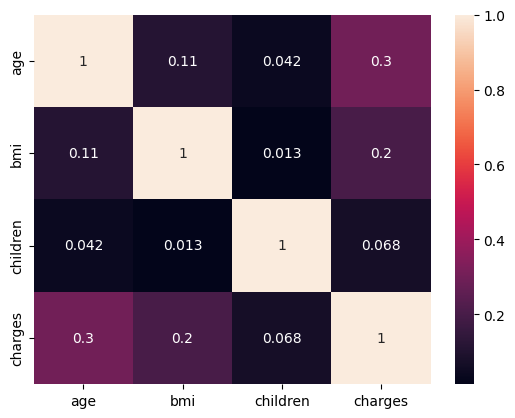

In [53]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

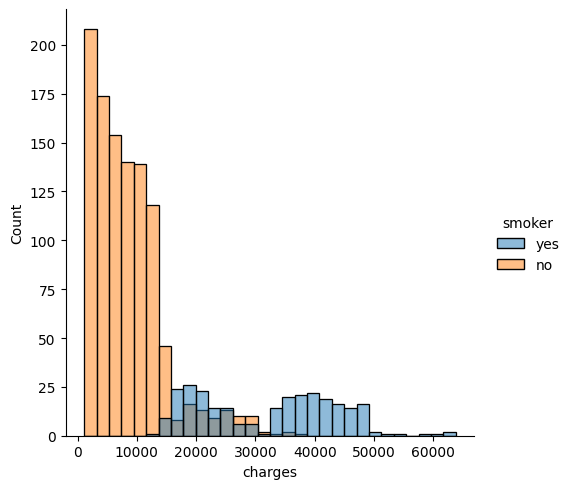

In [54]:
sns.displot(data,x='charges',hue='smoker')

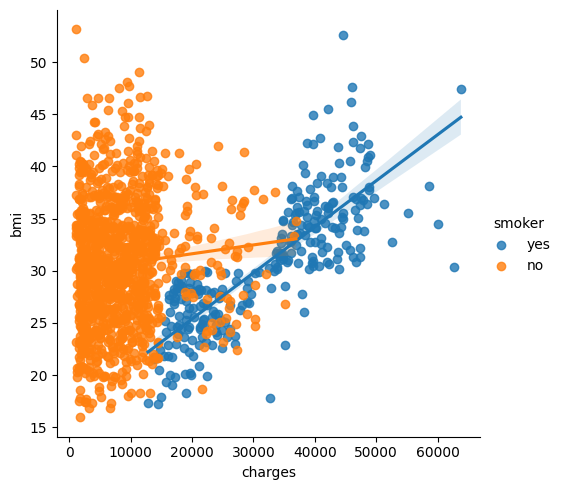

In [55]:
sns.lmplot(data,x='charges',y='bmi',hue='smoker')

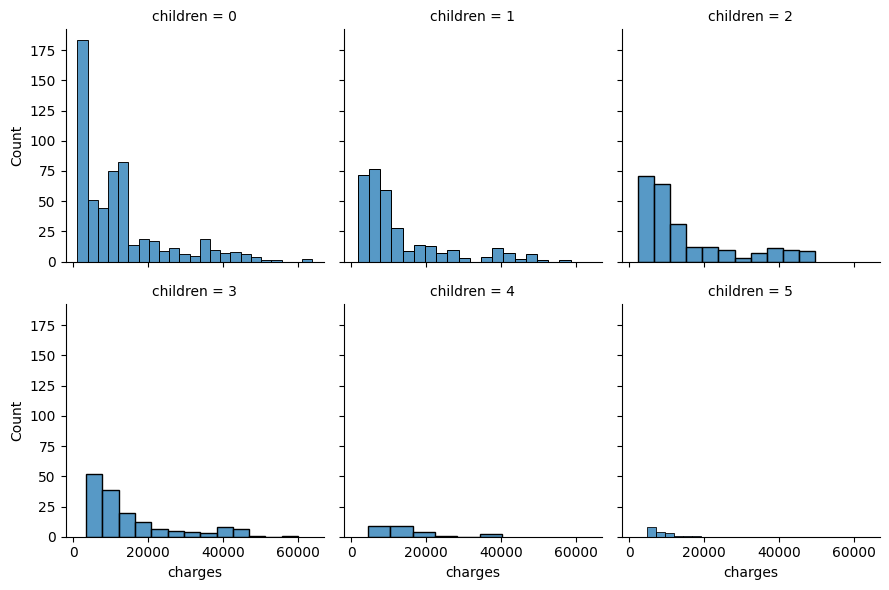

In [64]:
f = sns.FacetGrid(data,col='children',col_wrap=3)
f.map_dataframe(sns.histplot, x="charges")

In [57]:
data = data.join(pd.get_dummies(data[['sex','region','smoker']],drop_first=True))
data.drop(['sex','region','smoker'],axis=1,inplace=True)

In [58]:
data.sample(6)

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
1273,35,27.610,1,4747.05290,True,False,True,False,False
565,19,30.495,0,2128.43105,False,True,False,False,False
862,55,33.535,2,12269.68865,False,True,False,False,False
784,31,29.260,1,4350.51440,False,False,True,False,False
479,23,32.560,0,1824.28540,True,False,True,False,False
1122,53,36.860,3,46661.44240,False,True,False,False,True


<Axes: >

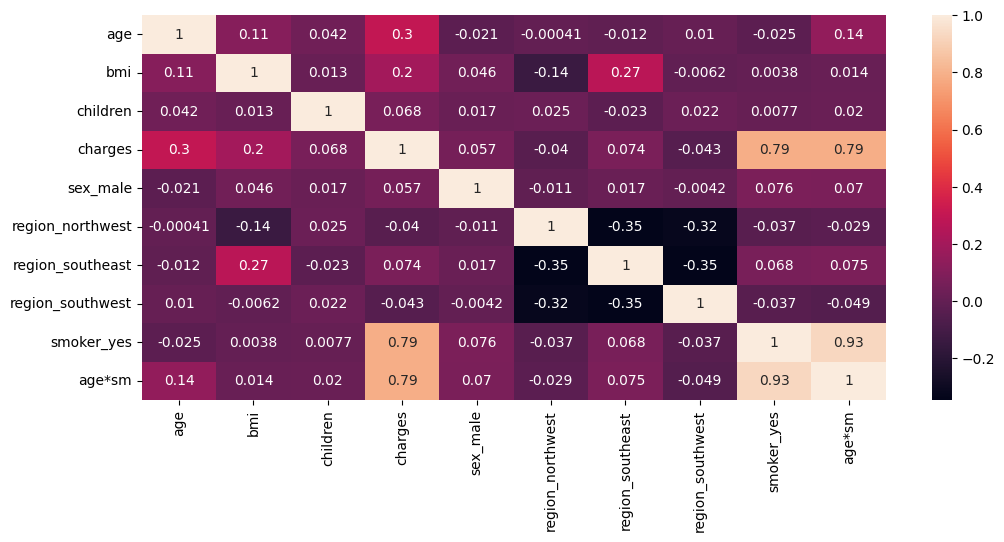

In [69]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)